# Linear Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
N = 100
X = np.random.random(N)*6-3
y = 0.5*X -1 +np.random.randn(N)*0.5

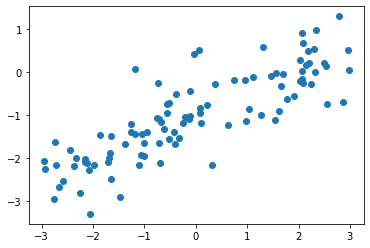

In [3]:
plt.scatter(X,y)

In [4]:
#build model
i = Input(shape = (1,))
x = Dense(1)(i)  #output = m*imput + b

model = Model(i,x)

2022-06-19 12:21:05.487835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
    metrics = ['mae']
    )
    

In [7]:
r = model.fit(
    X.reshape(-1,1), #make  a 1-d array
    y,
    epochs = 200, # steps of gradiant decent
    batch_size = 32,)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1176 - mae: 0.9351
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6027 - mae: 0.6494
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3642 - mae: 0.4648
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3239 - mae: 0.4319
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4019 - mae: 0.4963
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4201 - mae: 0.5086
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3775 - mae: 0.4781
Epoch 8/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3317 - mae: 0.4397
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3074 - mae: 0.4200
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3195 - mae: 0.4283
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.379

4/4 [==============================] - 0s 4ms/step - loss: 0.3119 - mae: 0.4197
Epoch 177/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3113 - mae: 0.4200
Epoch 178/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3087 - mae: 0.4178
Epoch 179/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3130 - mae: 0.4210
Epoch 180/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3155 - mae: 0.4215
Epoch 181/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3144 - mae: 0.4241
Epoch 182/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3115 - mae: 0.4215
Epoch 183/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3073 - mae: 0.4145
Epoch 184/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3211 - mae: 0.4261
Epoch 185/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3091 - mae: 0.4183
Epoch 186/200
4/4 [==============================] - 0s 4ms/step - loss: 0

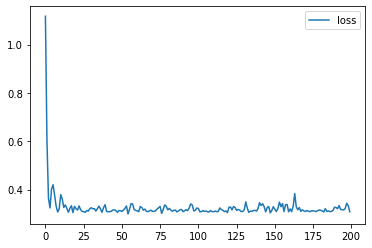

In [8]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

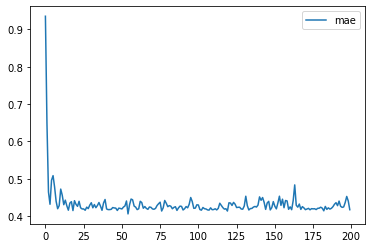

In [9]:
#plot mae per iteration
plt.plot(r.history['mae'], label = 'mae')
plt.legend()

In [10]:
#make prediction
Xtest = np.linspace(-3,3,20).reshape(-1,1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 66ms/step


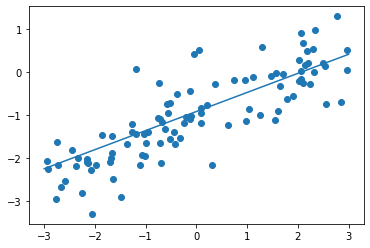

In [11]:
plt.scatter(X,y)
plt.plot(Xtest, ptest)

In [12]:
#check the learned parameter
model.layers

In [13]:
model.layers[1].get_weights()

[array([[0.44389385]], dtype=float32), array([-0.91861016], dtype=float32)]

# Classification

## Binary

In [46]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [16]:
np.random.seed(0)
tf.random.set_seed(0)

In [17]:
df = pd.read_csv('AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df = df[['airline_sentiment', 'text']]

<AxesSubplot:>

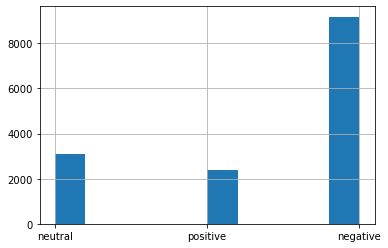

In [19]:
df['airline_sentiment'].hist()

In [20]:
df = df[df['airline_sentiment'] != 'neutral'].copy()

In [21]:
df['target'] = df['airline_sentiment'].map({'positive':1, 'negative':0})

In [22]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [23]:
df_train, df_test = train_test_split(df, random_state=42)

In [24]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

In [25]:
#data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [26]:
y_train = df_train['target']
y_test = df_test['target']

In [27]:
#input dimensions
D = X_train.shape[1]
D #number of columns in X_train, already set=2000 previously

2000

In [33]:
#build model
i = Input(shape = (D,))
x = Dense(1)(i) #sigmoid included in loss

model = Model(i,x)

In [35]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy']
    )

In [37]:
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size = 128,
    )

Epoch 1/40
68/68 [==============================] - 1s 7ms/step - loss: 0.5040 - accuracy: 0.7920 - val_loss: 0.3974 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.7970 - val_loss: 0.3393 - val_accuracy: 0.8209
Epoch 3/40
68/68 [==============================] - 0s 4ms/step - loss: 0.3220 - accuracy: 0.8194 - val_loss: 0.3027 - val_accuracy: 0.8416
Epoch 4/40
68/68 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.8449 - val_loss: 0.2769 - val_accuracy: 0.8600
Epoch 5/40
68/68 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.8634 - val_loss: 0.2582 - val_accuracy: 0.8770
Epoch 6/40
68/68 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.8813 - val_loss: 0.2444 - val_accuracy: 0.8881
Epoch 7/40
68/68 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.8925 - val_loss: 0.2336 - val_accuracy: 0.8999
Epoch 8/40
68/68 [==

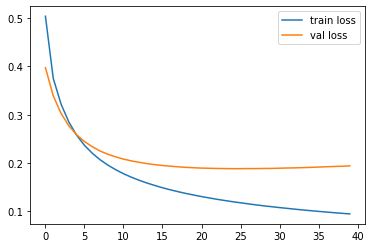

In [41]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show();

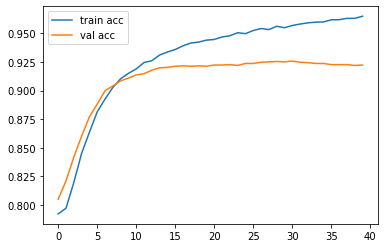

In [42]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show();

In [44]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten() 
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

#logit -> check if bigger than 0 -> true/false
#*1 -> convert to numbers
# convert to 1d array

91/91 [==============================] - 0s 2ms/step


In [45]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

array([[0.99095551, 0.00904449],
       [0.09777778, 0.90222222]])

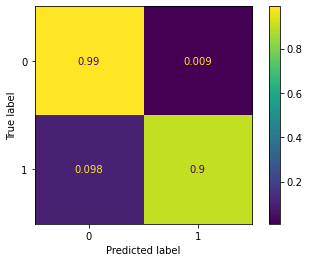

In [49]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

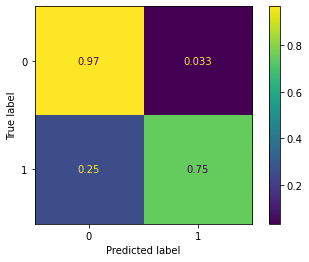

In [50]:
cm_test = confusion_matrix(y_test, P_test, normalize='true')
ConfusionMatrixDisplay(cm_test).plot()

In [56]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)

print('Train AUC: ', roc_auc_score(y_train, Pr_train))
print('Test AUC: ', roc_auc_score(y_test, Pr_test))

91/91 [==============================] - 0s 2ms/step
Train AUC:  0.995004943674528
Test AUC:  0.9547822416808056


In [54]:
print('Train F1: ', f1_score(y_train, P_train))
print('Test F1: ', f1_score(y_test, P_test))

Train F1:  0.9317269076305221
Test F1:  0.7932011331444758


In [55]:
model.layers

In [57]:
model.layers[1].get_weights()

[array([[-3.7461402],
        [ 3.2697623],
        [-1.5747175],
        ...,
        [ 2.0507073],
        [ 1.6260208],
        [-2.905553 ]], dtype=float32),
 array([-0.24967709], dtype=float32)]

In [58]:
w = model.layers[1].get_weights()[0]

In [59]:
word_idx_map = vectorizer.vocabulary_
word_idx_map

{'jetblue': 973,
 'thanks': 1726,
 'for': 753,
 'having': 855,
 'us': 1859,
 'hang': 838,
 'out': 1262,
 'at': 197,
 'tampa': 1708,
 'airport': 122,
 'forever': 756,
 'today': 1767,
 'it': 964,
 'really': 1420,
 'been': 243,
 'an': 147,
 'awesome': 217,
 'experience': 654,
 'americanair': 143,
 'was': 1898,
 'told': 1770,
 'you': 1993,
 'could': 452,
 'only': 1245,
 'refund': 1434,
 'me': 1107,
 'the': 1730,
 'cost': 448,
 'of': 1224,
 'my': 1179,
 'original': 1254,
 'return': 1476,
 'flight': 726,
 'note': 1211,
 'had': 828,
 'booked': 273,
 'more': 1164,
 'expensive': 653,
 'everyone': 635,
 'else': 602,
 'outstanding': 1267,
 'united': 1842,
 'denver': 516,
 'to': 1766,
 'austin': 207,
 'still': 1660,
 'on': 1239,
 'ground': 820,
 'issue': 961,
 'is': 959,
 'lack': 999,
 'announcement': 151,
 'made': 1086,
 'so': 1606,
 'late': 1010,
 'when': 1929,
 'gate': 793,
 'agent': 113,
 'there': 1734,
 'over': 1268,
 'hour': 897,
 'southwestair': 1626,
 'hold': 880,
 '30': 36,
 'min': 1141,


In [60]:
threshold = 2

print('Most positive words: ')
word_weight_tuples = []
for word, idx in word_idx_map.items():
    weight = w[idx,0]
    if weight > threshold:
        word_weight_tuples.append((word,weight))
        
word_weight_tuples = sorted(word_weight_tuples, key = lambda x: -x[1])

for i in range(10):
    word, weight = word_weight_tuples[i]
    print(word,weight)

Most positive words: 
thank 9.751887
thanks 9.4032545
worries 8.421164
great 7.9151134
awesome 7.3870063
love 7.2565536
excellent 7.070912
kudos 6.6613464
amazing 6.4788966
best 6.112959


In [63]:
print('Most negative words: ')
word_weight_tuples = []
for word, idx in word_idx_map.items():
    weight = w[idx,0]
    if weight < -threshold:
        word_weight_tuples.append((word,weight))
        
word_weight_tuples = sorted(word_weight_tuples, key = lambda x: x[1])

for i in range(10):
    word, weight = word_weight_tuples[i]
    print(word,weight)

Most negative words: 
worst -9.301173
paid -7.7200055
rude -7.640363
not -7.605647
disappointed -7.210057
nothing -6.828981
website -6.78104
hung -6.7175922
instead -6.5683794
list -6.2535033
